In [1]:
#importing required packages

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')

In [2]:
#uncomment the file that is to be exported. Note: metadata file is compulsory for the annotationas and metadata 
def export_csv():
    # Left lower extremity
    res = {}
    res['GRF_F_V_PRO_left'] = pd.read_csv(r'GRF_F_V_PRO_left.csv')
    '''
    res['GRF_F_AP_PRO_left'] = pd.read_csv(r'GRF_F_AP_PRO_left.csv')

    res['GRF_F_ML_PRO_left'] = pd.read_csv(r'GRF_F_ML_PRO_left.csv')

    res['GRF_COP_AP_PRO_left'] = pd.read_csv(r'GRF_COP_AP_PRO_left.csv')

    res['GRF_COP_ML_PRO_left'] = pd.read_csv(r'GRF_COP_ML_PRO_left.csv')

    # Right lower extremity
    res['GRF_F_V_PRO_right']= pd.read_csv(r'GRF_F_V_PRO_right.csv')

    res['GRF_F_AP_PRO_right'] = pd.read_csv(r'GRF_F_AP_PRO_right.csv')

    res['GRF_F_ML_PRO_right'] = pd.read_csv(r'GRF_F_ML_PRO_right.csv')

    res['GRF_COP_AP_PRO_right'] = pd.read_csv(r'GRF_COP_AP_PRO_right.csv')

    res['GRF_COP_ML_PRO_right'] = pd.read_csv(r'GRF_COP_ML_PRO_right.csv')
    '''
    
    # Annotations and Metadata
    res['GRF_Annotation'] = pd.read_csv(r'GRF_metadata.csv')
    return res

In [4]:
def getTitle(label):
    if label=="HC":
        return "Healthy Controls"
    elif label=="K":
        return "Knee impairment "
    elif label=="A":
        return "Ankle impairment"
    elif label=="H":
        return "Hip impairment"
    else:
        return "Calcaneus impairment"

In [8]:
#visualization of the left and right for a specific axis
def plot(GRF_left, GRF_right, GRF_Annotation, title,labels):
    #print('print ',GRF_left)
    dfs_left = {}
    dfs_right = {}
    for label in labels:
        df = pd.DataFrame(GRF_Annotation.loc[GRF_Annotation['CLASS_LABEL'] == label]['SESSION_ID'])
        dfs_left[label] = df.merge(GRF_left, how = 'inner', on='SESSION_ID')
        #print(label,'----------- ',dfs_left[label])
        dfs_right[label] = df.merge(GRF_right, how = 'inner', on='SESSION_ID')
    print("dfs_left",dfs_left)
    print("dfs_right",dfs_right)
    x_axis = np.linspace(0, len(GRF_left.columns[3:]),len(GRF_left.columns[3:])) #???
    fig, ax = plt.subplots(ncols=5, nrows=1, constrained_layout=True,figsize=(15,5))
    fig.suptitle(title)
    #print('HC ',dfs_left['HC'].iloc[1:2,3:].values.squeeze().shape)
    #print('print ',dfs_left['HC'].iloc[0:0,3:].values.squeeze())
    i = 0
    for label in labels:
        ax[i].set_title(getTitle(label))
        ax[i].set_ylabel('GRF values')
        ax[i].set_xlabel('Time')
        y_axis = []
        y_axis.append(dfs_left[label].iloc[1:2,3:].values.squeeze())
        y_axis.append(dfs_left[label].iloc[2:3,3:].values.squeeze())
        #y_axis.append(dfs_left[label].iloc[3:4,3:].values.squeeze())
        #y_axis.append(dfs_left[label].iloc[4:5,3:].values.squeeze())
        ax[i].set_aspect('auto')
        ax[i].plot(x_axis,y_axis[0],y_axis[1])
        i+=1

In [9]:
#uncomment the axis/axes that is/are to be examined
def plotAll(df_dict,labels):
    # Left lower extremity
    plot(df_dict['GRF_F_V_PRO_left'], df_dict['GRF_F_V_PRO_left'], df_dict['GRF_Annotation'], "GRF_F_V_PRO_left",labels)
    '''
    plot(df_dict['GRF_F_AP_PRO_left'], df_dict['GRF_F_AP_PRO_right'], df_dict['GRF_Annotation'], "GRF_F_AP_PRO_left",labels)
    plot(df_dict['GRF_F_ML_PRO_left'], df_dict['GRF_F_ML_PRO_right'],  df_dict['GRF_Annotation'], "GRF_F_ML_PRO_left",labels)
    plot(df_dict['GRF_COP_AP_PRO_left'], df_dict['GRF_COP_AP_PRO_right'],  df_dict['GRF_Annotation'], "GRF_COP_AP_PRO_left",labels)
    plot(df_dict['GRF_COP_ML_PRO_left'], df_dict['GRF_COP_ML_PRO_right'],  df_dict['GRF_Annotation'], "GRF_COP_ML_PRO_left",labels)
    '''

dfs_left {'HC':       SESSION_ID  SUBJECT_ID  TRIAL_ID  F_V_PRO_1  F_V_PRO_2  F_V_PRO_3  \
0          29885           1         1   0.048448   0.090260   0.150922   
1          29885           1         2   0.048441   0.087077   0.142254   
2          29885           1         3   0.048456   0.087342   0.142646   
3          29885           1         4   0.048454   0.082577   0.129628   
4          29885           1         5   0.048457   0.095727   0.164154   
...          ...         ...       ...        ...        ...        ...   
7750       39959         211         6   0.039712   0.075487   0.117627   
7751       39959         211         7   0.039717   0.081172   0.133802   
7752       39959         211         8   0.039706   0.078040   0.124381   
7753       39959         211         9   0.039718   0.076964   0.121780   
7754       39959         211        10   0.039718   0.079812   0.128928   

      F_V_PRO_4  F_V_PRO_5  F_V_PRO_6  F_V_PRO_7  ...  F_V_PRO_92  F_V_PRO_93  \
0 

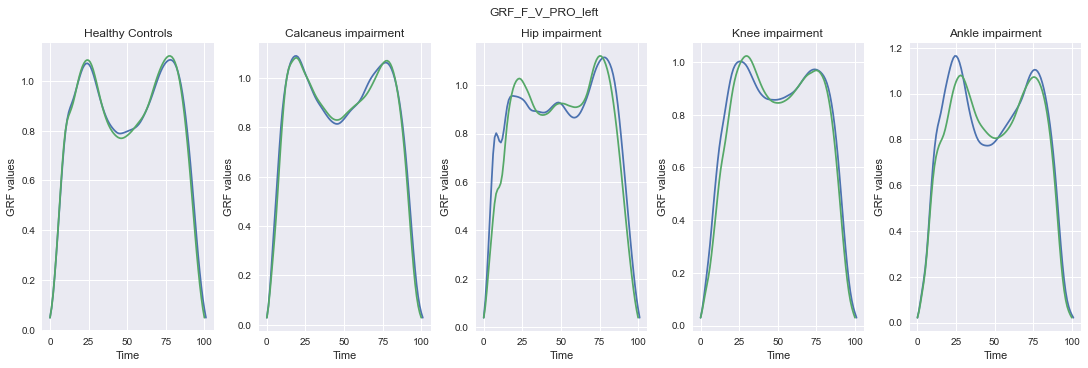

In [11]:
df_dict = export_csv()
labels = df_dict['GRF_Annotation']['CLASS_LABEL'].unique().tolist()
plotAll(df_dict, labels)